# **Lakukan penerapan metode clustering k-Means dan analisis jumlak k yang optimal**

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total  
0        1338  34112  
1        1776  33266  
2        7844  36610  
3        1788  27381  
4        5185  46100  
Silhouette_score k-Means++ k = 2: 0.47721489427149727
Silhouette_score k-Means++ k = 3: 0.26078866725513977
Silhouette_score k-Means++ k = 4: 0.41151945514855043
Silhouette_score k-Means++ k = 5: 0.21903822984707916
Silhouette_score k-Means++ k = 6: 0.14229928893974214
Silhouette_score k-Means++ k = 7: 0.10018723867388614
Silhouette_score k-Means++ k = 8: 0.161438447780373
Silhouette_score k-Means++ k = 9: 0.05296197973767196
Silhouette_

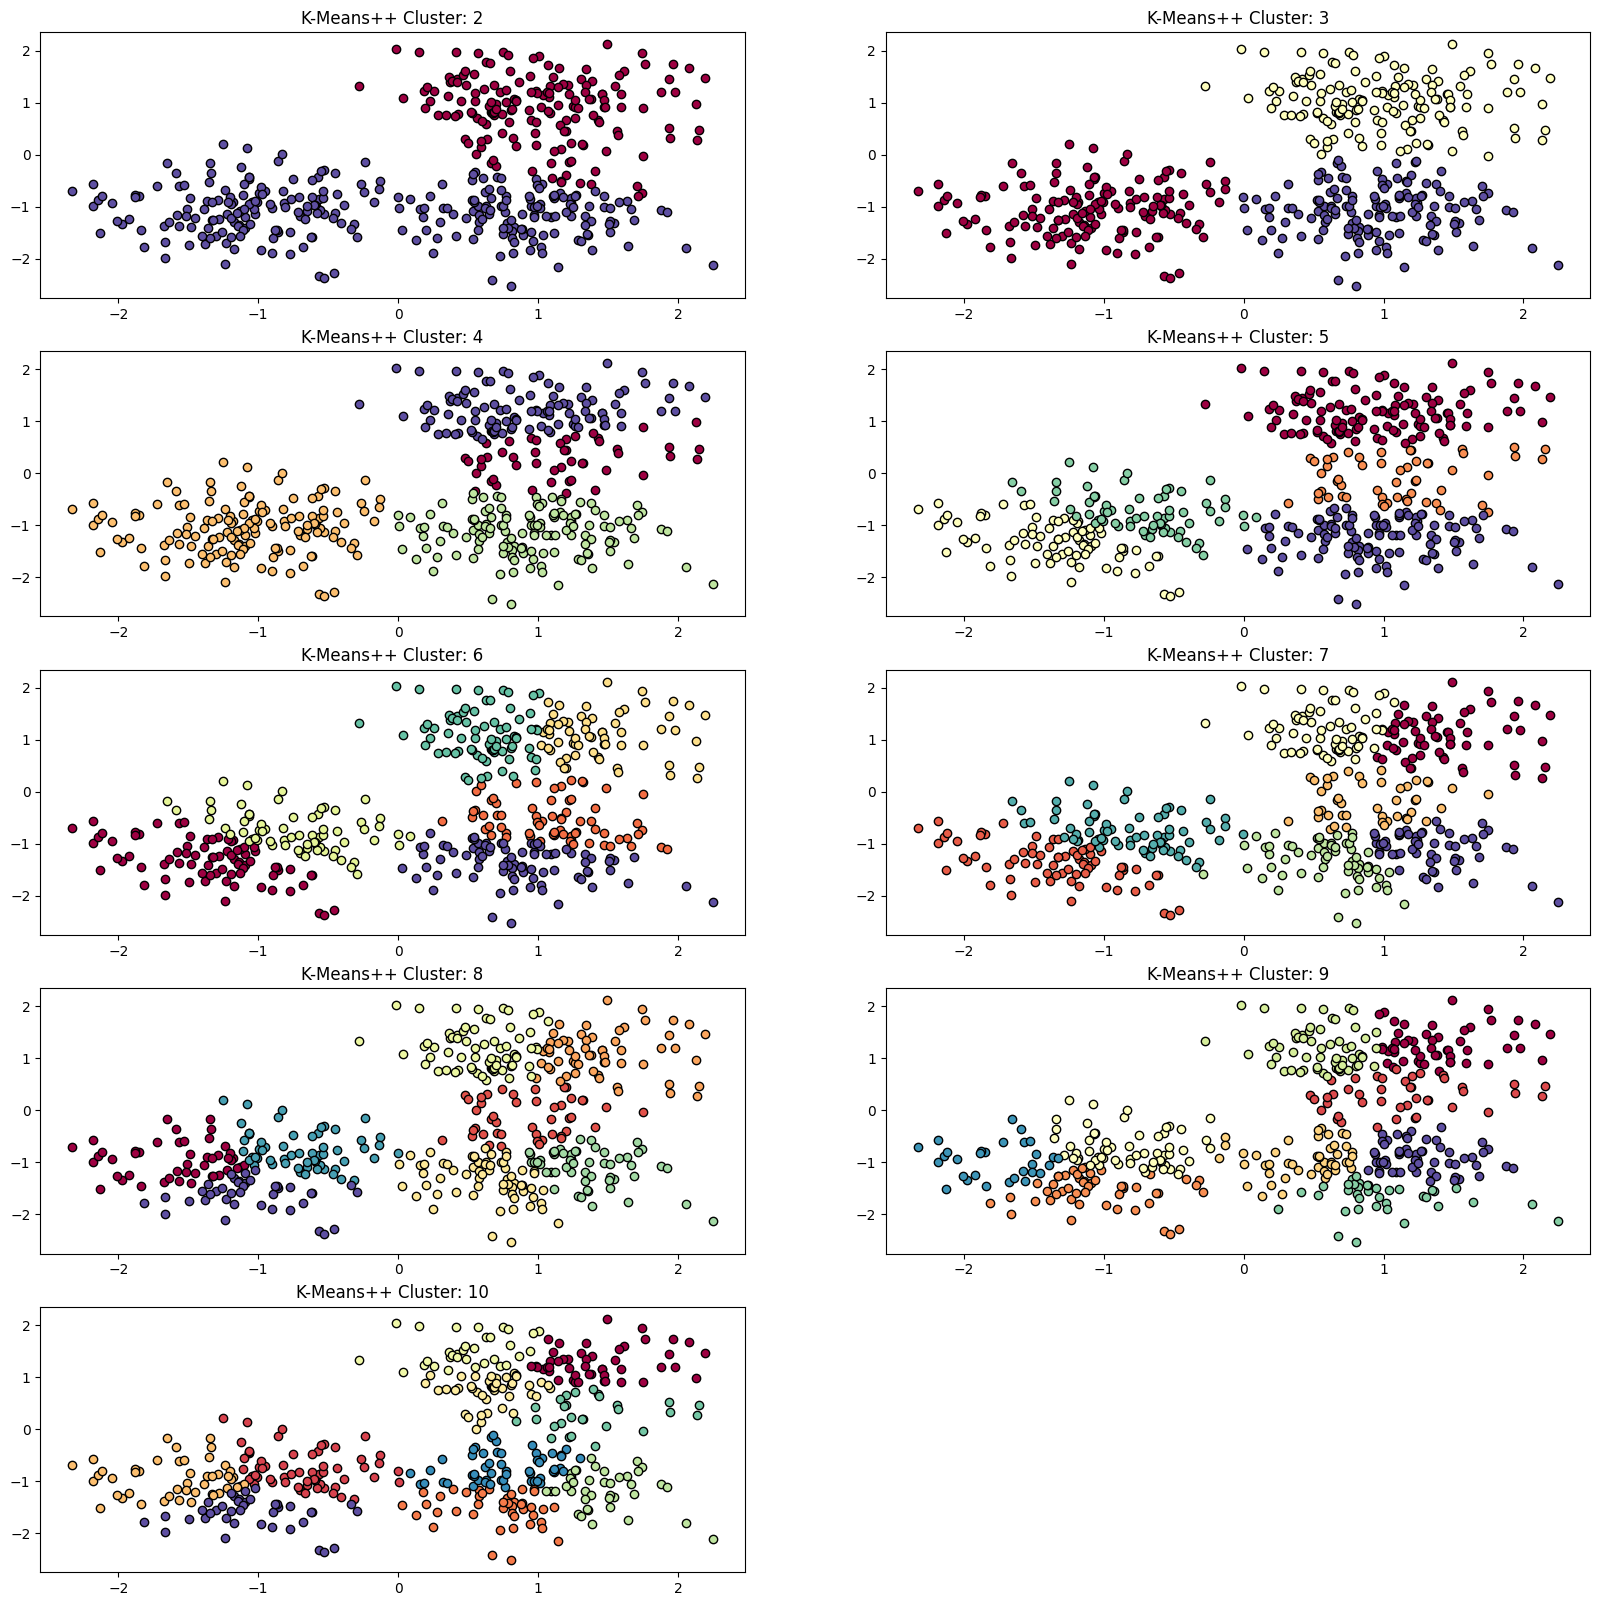

In [110]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

import pylab as pl
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# get data
data = pd.read_csv('./Wholesale customers data.csv')
data['Total'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicassen']
print (data.head())

# total K clustering
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# #initialise graph
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=len(data), centers=centers, cluster_std=0.5, random_state=0)

plt.figure(figsize=(20, 20))

# Plotting every K
for k in K:
    plt.subplot(5, 2, k-1)
    
    # Compute KMeans++
    kmeans_plus = KMeans(n_clusters=k, init='k-means++').fit(X)
    unique_labels = set(kmeans_plus.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        kmeansplus_labels = (kmeans_plus.labels_ == k)
        xy = X[kmeansplus_labels]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    print("Silhouette_score k-Means++ k = %d:" % (k+1), silhouette_score(X, kmeansplus_labels))
    plt.title('K-Means++ Cluster: %d' % kmeans_plus.n_clusters)



n_clusters k-Means= 2 Silhouette_score: 0.47721489427149727
n_clusters k-Means= 3 Silhouette_score: 0.5674697191493248
n_clusters k-Means= 4 Silhouette_score: 0.47653319840138686
n_clusters k-Means= 5 Silhouette_score: 0.37527855073325794
n_clusters k-Means= 6 Silhouette_score: 0.3354224151165824
n_clusters k-Means= 7 Silhouette_score: 0.32990444153990345
n_clusters k-Means= 8 Silhouette_score: 0.3426770245714747
n_clusters k-Means= 9 Silhouette_score: 0.33730039830816805
n_clusters k-Means= 10 Silhouette_score: 0.340567343901869


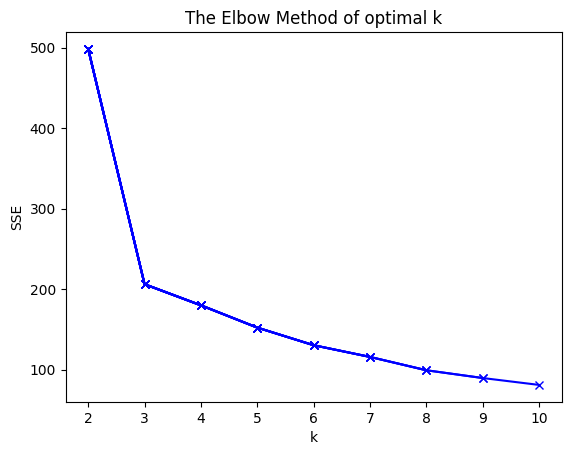

In [107]:
# Find optimal number of clusters using silhouette score and elbow method
SSE = {}
silhouette_kmeans = {}

for k in K:
  # find kmeans clusters
  kmeans = KMeans(n_clusters=k, init='k-means++').fit(X)
  kmeans_labels = kmeans.labels_
  
  # find SSE
  SSE[k] = kmeans.inertia_
  
  # find silhouette score
  silhouette_kmeans[k] = silhouette_score(X, kmeans_labels)
  print("n_clusters k-Means=", k, "Silhouette_score:", silhouette_kmeans[k])
  pl.plot(list(SSE.keys()), list(SSE.values()), 'b-x')

pl.xlabel('k')
pl.ylabel('SSE')
pl.title('The Elbow Method of optimal k')

pl.show()
